## Atelier 1

### Partie 1 : Regression lineaire simple

In [102]:
# Import necessary libraries for data analysis, visualization, and machine learning
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression

In [103]:
# Read the CSV file "advertising.csv" into a Pandas DataFrame
data = pd.read_csv("data/advertising.csv")

In [104]:
# Display the first few rows of the DataFrame to get an initial overview.
print(data.head())

      TV  Radio  Newspaper  Sales
0  230.1   37.8       69.2   22.1
1   44.5   39.3       45.1   10.4
2   17.2   45.9       69.3   12.0
3  151.5   41.3       58.5   16.5
4  180.8   10.8       58.4   17.9


In [105]:
# Print information about the DataFrame, including data types and non-null values.
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB
None


In [106]:
# Generate summary statistics for the DataFrame, such as count, mean, min, max, etc.
print(data.describe())

               TV       Radio   Newspaper       Sales
count  200.000000  200.000000  200.000000  200.000000
mean   147.042500   23.264000   30.554000   15.130500
std     85.854236   14.846809   21.778621    5.283892
min      0.700000    0.000000    0.300000    1.600000
25%     74.375000    9.975000   12.750000   11.000000
50%    149.750000   22.900000   25.750000   16.000000
75%    218.825000   36.525000   45.100000   19.050000
max    296.400000   49.600000  114.000000   27.000000


In [107]:
# Extracting the "TV" and "Sales" data from the DataFrame and displaying the first few rows.
X = data["TV"]
y = data["Sales"]

print(X.head())
print(y.head())

0    230.1
1     44.5
2     17.2
3    151.5
4    180.8
Name: TV, dtype: float64
0    22.1
1    10.4
2    12.0
3    16.5
4    17.9
Name: Sales, dtype: float64


#### It is a regression problem because the goal is to predict a continuous output variable ("Sales"), which means the output can take any numerical value within a certain range. In regression problems, the objective is to predict real-valued quantities such as sales, prices, or incomes, as opposed to classification problems where the goal is to predict discrete categories.

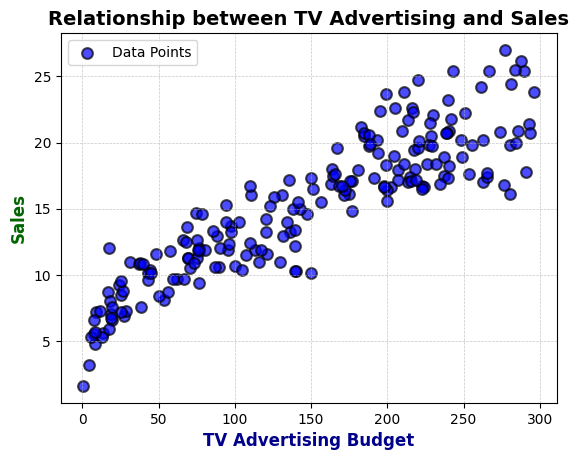

In [108]:
plt.scatter(X, y, c='blue', marker='o', s=60, alpha=0.7, label='Data Points', edgecolors='k', linewidths=1.5)
plt.xlabel('TV Advertising Budget', fontsize=12, color='darkblue', fontweight='bold')
plt.ylabel('Sales', fontsize=12, color='darkgreen', fontweight='bold')
plt.title('Relationship between TV Advertising and Sales', fontsize=14, fontweight='bold')
plt.grid(linestyle='--', linewidth=0.5, alpha=0.7)

# Show the plot
plt.legend()
plt.show()

In [109]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

print("Taille de l'ensemble d'apprentissage (X_train, y_train):", X_train.shape, y_train.shape)
print("Taille de l'ensemble de test (X_test, y_test):", X_test.shape, y_test.shape)

Taille de l'ensemble d'apprentissage (X_train, y_train): (160,) (160,)
Taille de l'ensemble de test (X_test, y_test): (40,) (40,)


In [110]:
# Calculates the Mean Squared Error (MSE) for a linear regression model.
# X : Input feature data.
# y : True target values.
# W : Coefficients (w0, w1) for the linear regression model.
# mse : The Mean Squared Error (MSE) between the true and predicted target values.

def MSE(X, y, W):
    w0, w1 = W
    y_pred = w0 + w1 * X
    squared_errors = (y_pred - y) ** 2
    mse = np.mean(squared_errors)
    return mse

In [111]:
# Calculates the gradient of the Mean Squared Error (MSE) with respect to the model parameters.
# X : Input feature data.
# y : True target values.
# W : Coefficients (w0, w1) for the linear regression model.
# dMSE_dw0, dMSE_dw1 : The partial derivatives of the MSE with respect to the model parameters.

def Gradient(X, y, W):
    w0, w1 = W
    n = len(X)
    y_pred = w0 + w1 * X
    dMSE_dw0 = -2 * np.sum(y - y_pred) / n
    dMSE_dw1 = -2 * np.sum((y - y_pred) * X) / n
    return dMSE_dw0, dMSE_dw1

In [112]:
# Updates the weights of a model based on the gradient and the learning rate.
# grad : The gradients with respect to the weights (dW0, dW1).
# W : The current weights (W0, W1).
# alpha : The learning rate.
# new_W0, new_W1 : Updated weights (new_W0, new_W1) after applying the update.

def MiseJour(grad, W, alpha):
    dW0, dW1 = grad
    W0, W1 = W
    new_W0 = W0 - alpha * dW0
    new_W1 = W1 - alpha * dW1
    return new_W0, new_W1

In [113]:
# Performs batch gradient descent to optimize a linear regression model.
# X : Input features.
# y : Target values.
# W : Initial model parameters (W0, W1).
# N_max : Maximum number of iterations.
# alpha : Learning rate.
# eps : Convergence threshold (stop when change in mean squared error is below eps).
# (W0, W1) : Optimized model parameters.
# mse_history : List of mean squared errors at each iteration.
    
def BatchGradientDescent(X, y, W, N_max, alpha, eps):
    W0, W1 = W
    mse_history = []
    for iteration in range(N_max):
        gradient = Gradient(X, y, (W0, W1))
        W0, W1 = MiseJour(gradient, (W0, W1), alpha)
        mse = MSE(X, y, (W0, W1))
        mse_history.append(mse)
        if iteration > 0 and abs(mse_history[-2] - mse_history[-1]) < eps:
            break
    return (W0, W1), mse_history

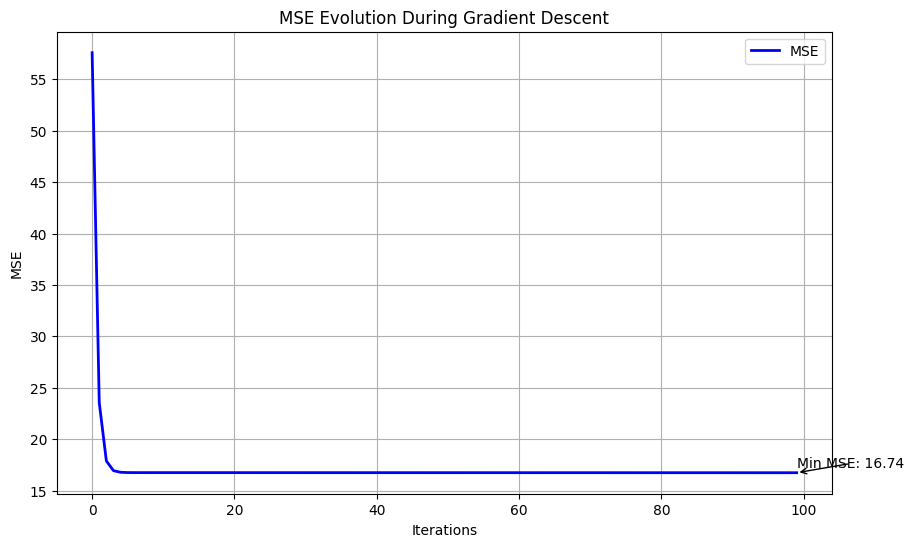

In [114]:
W_initial = (0.0, 0.0)
N_max = 100
alpha = 0.00001   # alpha = 0.1 is way too big for this situation (When the learning rate (alpha) chosen is 
                  # too big in gradient descent algorithms, it can lead to overshooting the optimal solution 
                  # and potentially prevent convergence. It may cause the algorithm to diverge, making the model 
                  # parameters oscillate and preventing it from finding the minimum of the loss function, resulting 
                  # in instability.)
eps = 1e-6

meilleurs_parametres, evolution_MSE = BatchGradientDescent(X_train, y_train, W_initial, N_max, alpha, eps)

plt.figure(figsize = (10, 6))
plt.plot(range(len(evolution_MSE)), evolution_MSE, color = 'b', linestyle = '-', linewidth = 2, label = 'MSE')

min_mse_index = np.argmin(evolution_MSE)
min_mse = evolution_MSE[min_mse_index]
plt.annotate(f'Min MSE: {min_mse:.2f}', xy = (min_mse_index, min_mse), xytext = (min_mse_index, min_mse + 0.5),
             arrowprops = dict(arrowstyle = '->'))

plt.xlabel('Iterations')
plt.ylabel('MSE')
plt.title('MSE Evolution During Gradient Descent')
plt.grid(True)
plt.legend()
plt.show()

In [115]:
def CalculErreur(X, y, W):
    w0, w1 = W
    y_pred = w0 + w1 * X
    mse = np.mean((y - y_pred) ** 2)
    return mse

erreur_du_modele = CalculErreur(X_test, y_test, meilleurs_parametres)
print("Model Error (MSE):", erreur_du_modele)

Model Error (MSE): 20.681973829480818


In [116]:
# Convert Pandas Series to NumPy arrays
X_train = X_train.values
y_train = y_train.values

model = LinearRegression()
k = 5
mse_scores = -cross_val_score(model, X_train.reshape(-1, 1), y_train, cv=k, scoring='neg_mean_squared_error')
print("Train ~ Cross-Validation Mean MSE: {:.4f}".format(mse_scores.mean()))

# Convert Pandas Series to NumPy arrays
X_test = X_test.values
y_test = y_test.values

model = LinearRegression()
k = 5
mse_scores = -cross_val_score(model, X_test.reshape(-1, 1), y_test, cv=k, scoring='neg_mean_squared_error')
print("Test ~ Cross-Validation Mean MSE: {:.4f}".format(mse_scores.mean()))

Train ~ Cross-Validation Mean MSE: 5.1286
Test ~ Cross-Validation Mean MSE: 7.0242


#### Comparison :
- Cross-Validation Mean MSE : 7.0242
- Model Error (MSE) : 20.681973829480818 

The cross-validation mean MSE is significantly lower (better) than the model error MSE. This suggests that the model performs better when evaluated using cross-validation than on the dataset it was trained on.
#### Conclusion :
The cross-validation results indicate that the model generalizes well to unseen data, with a mean MSE of 7.0242. However, the model's performance on the training data, as indicated by the model error MSE of 20.681973829480818, is higher, suggesting overfitting may be occurring. To improve the model, further tuning, regularization, or the collection of more data may be necessary to address overfitting.

### Partie 2 : Regression lineaire multiple

In [117]:
X = data[['TV', 'Radio', 'Newspaper']]
y = data['Sales']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

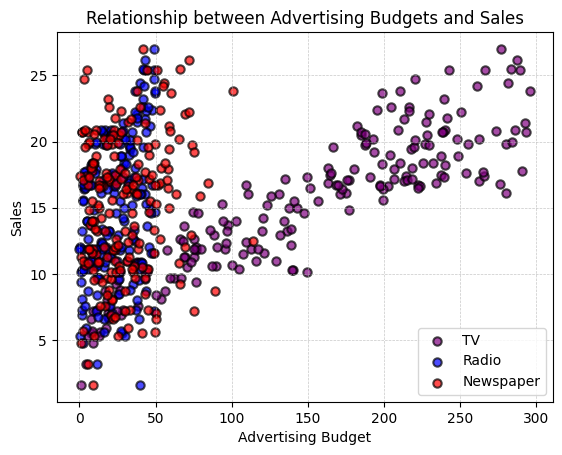

In [118]:
X_TV = data['TV']
X_Radio = data['Radio']
X_Newspaper = data['Newspaper']
y = data['Sales']

plt.scatter(X_TV, y, c = 'purple', marker = 'o', label = 'TV', alpha = 0.7, edgecolors = 'k', linewidths = 1.5)
plt.scatter(X_Radio, y, c = 'blue', marker = 'o', label = 'Radio', alpha = 0.7, edgecolors = 'k', linewidths = 1.5)
plt.scatter(X_Newspaper, y, c = 'red', marker ='o', label = 'Newspaper', alpha = 0.7, edgecolors = 'k', linewidths = 1.5)

plt.xlabel('Advertising Budget')
plt.ylabel('Sales')
plt.title('Relationship between Advertising Budgets and Sales')
plt.grid(linestyle = '--', linewidth = 0.5, alpha = 0.7)

plt.legend()
plt.show()

In [119]:
def MSE(X, y, W):
    y_pred = np.dot(X, W)
    squared_errors = (y_pred - y) ** 2
    mse = np.mean(squared_errors)
    return mse

In [120]:
def Gradient(X, y, W):
    y_pred = np.dot(X, W)
    error = y_pred - y
    gradient = 2 * np.dot(X.T, error) / len(y)
    return gradient

In [121]:
def MiseJour(grad, W, alpha):
    new_W = W - alpha * grad
    return new_W

In [122]:
def BatchGradientDescent(X, y, W, N_max, alpha, eps):
    mse_history = []
    for iteration in range(N_max):
        gradient = Gradient(X, y, W)
        W = MiseJour(gradient, W, alpha)
        mse = MSE(X, y, W)
        mse_history.append(mse)
        if iteration > 0 and abs(mse_history[-2] - mse_history[-1]) < eps:
            break
    return W, mse_history

In [123]:
W_initial = np.zeros(3)
N_max = 100
alpha = 0.00001
eps = 1e-6

In [124]:
meilleurs_parametres, evolution_MSE = BatchGradientDescent(X_train, y_train, W_initial, N_max, alpha, eps)
test_mse = MSE(X_test, y_test, meilleurs_parametres)

In [125]:
print("Best parameters (W):", meilleurs_parametres)
print("Training MSE:", evolution_MSE[-1])
print("Test MSE:", test_mse)

Best parameters (W): [0.0735257  0.07250614 0.05899194]
Training MSE: 7.0413123104262825
Test MSE: 9.998278051056378


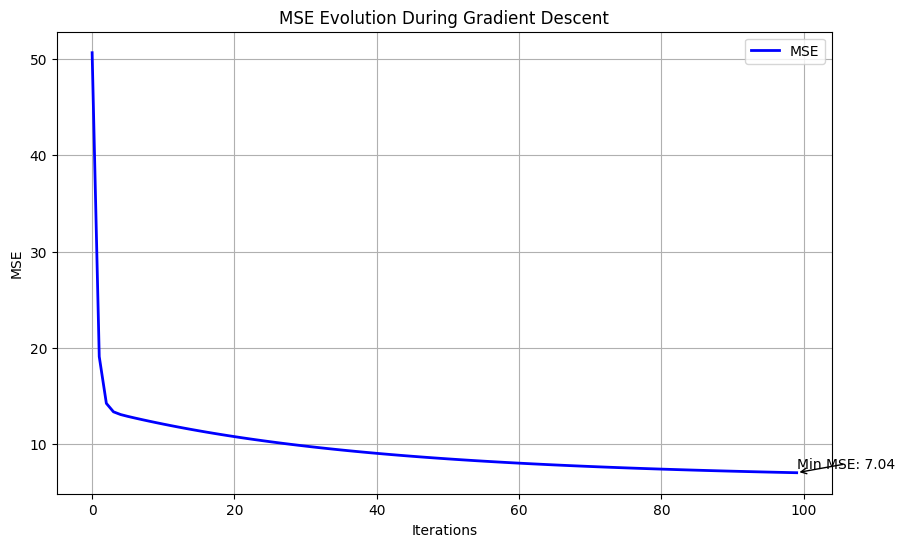

In [126]:
plt.figure(figsize = (10, 6))
plt.plot(range(len(evolution_MSE)), evolution_MSE, color = 'blue', linestyle = '-', linewidth = 2, label = 'MSE')

min_mse_index = np.argmin(evolution_MSE)
min_mse = evolution_MSE[min_mse_index]
plt.annotate(f'Min MSE: {min_mse:.2f}', xy = (min_mse_index, min_mse), xytext = (min_mse_index, min_mse + 0.5),
             arrowprops=dict(arrowstyle = '->'))

plt.xlabel('Iterations')
plt.ylabel('MSE')
plt.title('MSE Evolution During Gradient Descent')
plt.grid(True)
plt.legend()
plt.show()

In [127]:
model = LinearRegression()

k = 5
mse_scores = -cross_val_score(model, X_test, y_test, cv = k, scoring = 'neg_mean_squared_error')
mean_mse = mse_scores.mean()

print("Cross-Validation Mean MSE:", mean_mse)
print("Model Error (MSE):", test_mse)

Cross-Validation Mean MSE: 3.1850308039745676
Model Error (MSE): 9.998278051056378
